<a href="https://colab.research.google.com/github/aman9891/twitter-airline-sentiment/blob/master/US_Airline_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.text import *
from fastai.vision import *
from google.colab import files
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import io
import html
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
# PATH = Path('data/')

In [0]:
def clean_tweet(tweet_text):
    text = re.sub(r' ?http[^ ]*', r'', tweet_text)
    text = re.sub(r'@AmericanAir|@JetBlue|@SouthwestAir|@united|@USAirways|@VirginAmerica', r'', text)
    return text

In [3]:
# uploaded = files.upload()

In [3]:
# full_data = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))
full_data = pd.read_csv('Tweets.csv')
full_data.shape

(14640, 15)

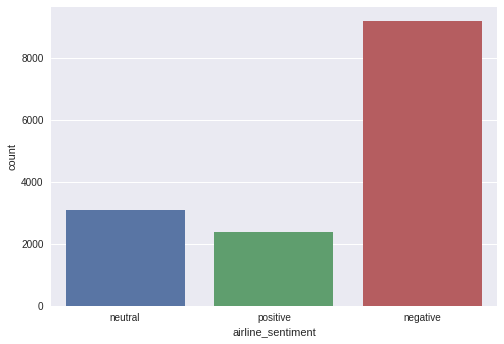

In [4]:
sns.countplot(x='airline_sentiment', data=full_data)

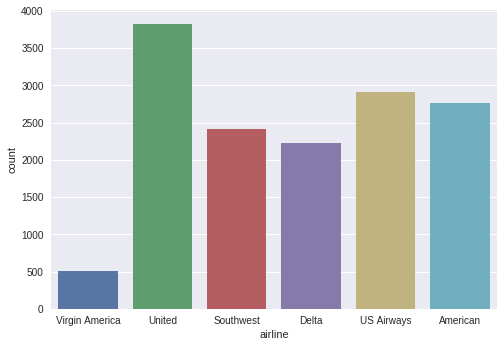

In [5]:
sns.countplot(x='airline', data=full_data)

In [0]:
training_target = full_data['airline_sentiment']
del full_data['airline_sentiment']
columns_list = full_data.columns
training_features = full_data

In [0]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(training_features, training_target)
X_res = pd.DataFrame(X_res, columns = columns_list)
y_res = pd.DataFrame(y_res, columns=['airline_sentiment'])

In [8]:
full_data = pd.concat([X_res, y_res], axis=1)
full_data.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,airline_sentiment
0,570306133677760513,1,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),neutral
1,570301130888122368,0.3486,NaN,0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),positive
2,570301083672813571,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),neutral
3,570301031407624196,1,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),negative
4,570300817074462722,1,Can't Tell,1,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),negative


In [9]:
full_data.shape

(27534, 15)

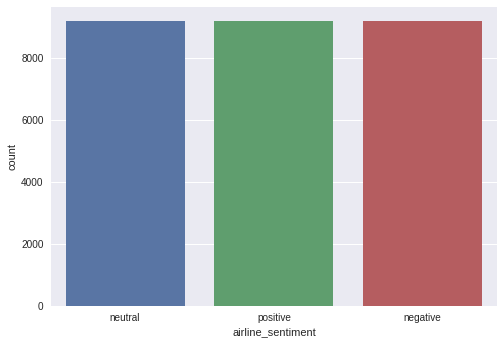

In [10]:
sns.countplot(x='airline_sentiment', data=full_data)

In [11]:
data = full_data[['airline_sentiment', 'text']]
data.columns = ['labels', 'text']
data.head()

,labels,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [12]:
tweets = []

for tweet in data['text']:
    tweets.append(clean_tweet(tweet))
    
data['text'] = tweets
data.head()

,labels,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experien...
2,neutral,I didn't today... Must mean I need to take an...
3,negative,"it's really aggressive to blast obnoxious ""en..."
4,negative,and it's a really big bad thing about it


In [14]:
data_trn, data_val = train_test_split(data, stratify = data['labels'], test_size = 0.3, random_state = 42)
data_trn.reset_index(drop=True, inplace=True)
data_val.reset_index(drop=True, inplace=True)
print(data_trn.shape, data_val.shape)
print(data_trn.head())
print(data_val.head())

(19273, 2) (8261, 2)
     labels                                               text
0  negative   flight 3870 to Newark, stuck in the runway. A...
1  positive   thanks 😩. idk if it still Late Flight but I h...
2  positive                    telling my Fam in Vegas now. :)
3  negative   flight Cancelled Flightled, stuck for 3 days....
4  positive   on a happy note our 719 crew is wonderful. Ca...
     labels                                               text
0  positive   LTALJX, from DCA to OMA this morning. All of ...
1  positive                thanks for your help! #jetbluesofly
2  positive   thanks great recap. I wouldn't have been able...
3  negative   typically once you get the problem fixed - th...
4   neutral   : Hello..are flights taking off from @DallasL...


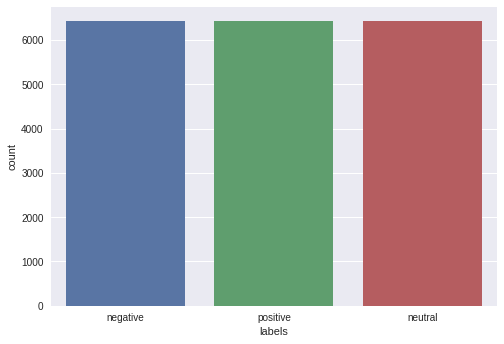

In [15]:
sns.countplot(x='labels', data=data_trn)

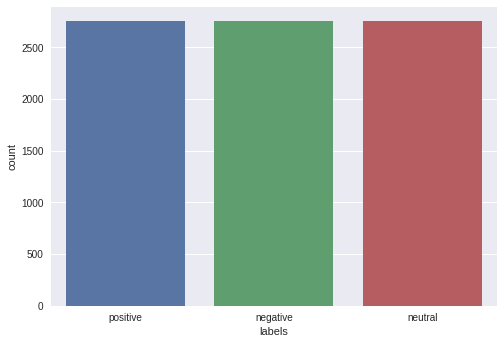

In [16]:
sns.countplot(x='labels', data=data_val)

In [0]:
# data_trn.to_csv('train2.csv', header=False, index=False)
# data_val.to_csv('test2.csv', header=False, index=False)

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = data_trn, valid_df = data_val, path = "./")
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = data_trn, valid_df = data_val, vocab=data_lm.train_ds.vocab, path = "./")

In [0]:
# data_lm.save()
# data_clas.save()

In [0]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, pretrained=URLs.WT103, drop_mult=0.5)

In [0]:
learn.metrics = [accuracy]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.40E-02


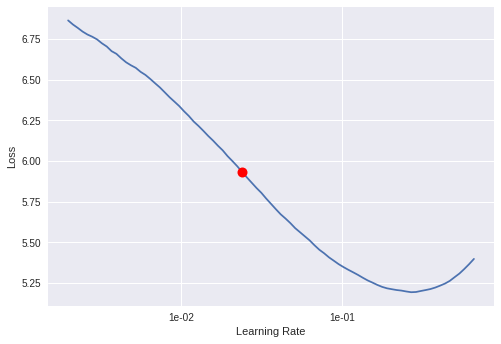

In [20]:
learn.lr_find(start_lr=float('1e-03'), end_lr=float('1'), num_it=100, stop_div=True)
learn.recorder.plot()

In [21]:
# train the learner object with learning rate
learn.freeze_to(-3)
learn.fit_one_cycle(1, 2.40E-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.186267,3.580707,0.333150


In [0]:
# Save this encoder to use it for classification later
learn.save_encoder('ft_enc_new')

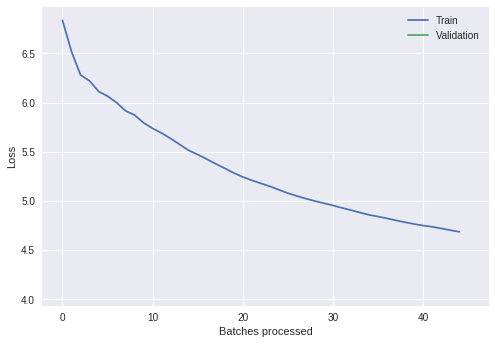

In [17]:
learn.recorder.plot_losses()

In [23]:
data_clas.show_batch()

text,target
xxbos xxmaj hi have a question re future xxmaj flight xxmaj booking xxmaj problems . xxup dub - xxup jac 29 / 9 xxup jac - xxup lax 8 / 10 xxup lax - xxup dub 13 / 10 . i 'm * xxup g. xxmaj what is checked bag allowance for xxup jac - xxup lax ?,neutral
xxbos xxmaj the xxmaj fact xxmaj that u xxmaj see xxmaj black xxmaj history xxmaj month 12 xxmaj months a xxmaj year xxmaj is xxmaj honorable ! xxmaj we xxup will xxup be xxmaj an xxmaj economic xxmaj base xxmaj for xxmaj corp. xxmaj like u xxmaj in xxmaj future !,positive
xxbos xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup gma up here this xxup am .. so i understand .. xxmaj btw xxup a.a is my xxmaj airline when i m able to trv .. xxmaj love you guys . : ),positive
"xxbos xxup by xxup the xxup grace xxup of xxup god , i xxup made xxup it ! “ : xxup @__rwg _ _ xxmaj we do n't have those powers in here . xxmaj we hope you can make that flight . ”",positive
xxbos - flight was xxmaj cancelled xxmaj flightled to xxmaj buf today . xxmaj waited in line for 2 + hrs & & cus service was rude . xxmaj no flight until xxmaj tues . xxmaj need to get to xxup roc .,negative


In [0]:
# Use the data_clas object we created earlier to build a classifier with our fine-tuned encoder
classifier = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)

In [0]:
classifier.load_encoder('ft_enc_new')

In [26]:
# We will again try to fit our model
classifier.fit_one_cycle(1, 2.40E-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,0.680447,0.555378,0.763467


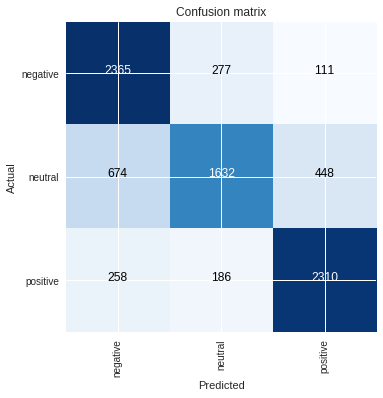

In [27]:
# Get predictions
preds, targets, losses = classifier.get_preds(with_loss=True)
# interp = ClassificationInterpretation(data_clas, preds, targets, losses)
interp = ClassificationInterpretation.from_learner(classifier)
interp.plot_confusion_matrix()